In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [47]:
df = pd.read_csv(r'Ntu_Orders.csv')

In [48]:
df.head()

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,350.0,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,540.0,-57.0,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,445.0,-44.0,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False


In [49]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
data = df.groupby(by='new_DateId')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True)
data.head(5)

,new_DateId,Quantity
0,2017-01-01,3823
1,2017-01-02,5105
2,2017-01-03,3623
3,2017-01-04,2889
4,2017-01-05,2843


### 使用 matplotlib 正式進行資料視覺化 (也能自行選擇 seaborn, plotly 等套件)
1. 資料 : 使用和第一次任務相同的整理後每日銷售量資料，只不過這邊把之前的 series 格式轉成更正式的 dataframe 格式。
2. 使用 : 在使用 matplotlib 畫圖時基本 SOP : 
        (1) 先造出用來放畫布的 figure 
        (2) 造出用來畫畫的畫布 axe 
        (3) 畫在畫布 axe 上 
        (4) 更多細節設定，像是 x, y軸 
        (5) 顯示 show 出來
3. 說明 : 
    下方 `fig, ax = plt.subplots()` 就是一次造出 (1) figure 和 (2) axe，然後透過 `plot()` 畫在 axe 上，最後因為一開始有加這行程式碼 `%matplotlib inline` 所以顯示部份 (5) 都會默認被顯示出來！ 

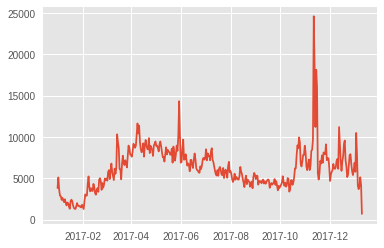

In [51]:
fig, ax = plt.subplots()
ax.plot(data['new_DateId'], data['Quantity'])

如此我們就已使用 matplotlib 畫出跟第一周一樣的圖了~

### 本週任務前導 ：
1. 在出任務之前，我們先教大家透過 `datetime()` 模塊把日期轉成 **星期幾**
2. 我們使用 `datetime()` 模塊的 `weekday()` 方法把所有的日期 (new_DateId) 轉成星期幾，並存成新的一個 column (weekday)

In [45]:
import datetime
data['weekday'] = data['new_DateId'].apply(lambda x: x.weekday())
data.head()

,new_DateId,Quantity,weekday
0,2017-01-01,3823,6
1,2017-01-02,5105,0
2,2017-01-03,3623,1
3,2017-01-04,2889,2
4,2017-01-05,2843,3


### 本週任務 ：
使用任意畫圖包畫出 **星期幾 v.s 銷售量** 的 bar chart。